***Importing required libraries.***

In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [18]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries (2).csv


***Import dataset and print it.***

In [31]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['Position_Salaries.csv'].decode('utf-8')))
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2: ].values

print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


***Feature scaling***

In [32]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# ***Building the Support Vector Regressor***

***Importing model and training it.***

In [33]:
from sklearn.svm import SVR

reg = SVR(kernel = 'rbf')
reg = reg.fit(x , y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Make predictions.***

In [37]:
predictions = reg.predict(sc_x.transform(np.array([[6.5]])))
predictions = sc_y.inverse_transform(predictions)
print(predictions)

[170370.0204065]


# ***Visualising the data.***

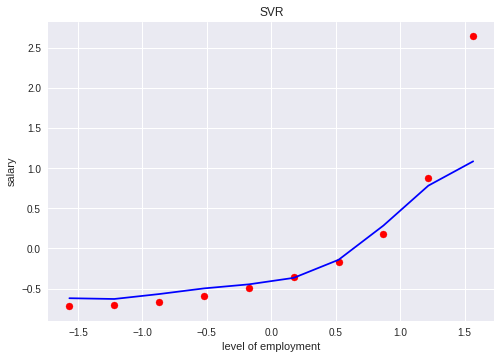

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x , y , color = 'red')
plt.plot(x , reg.predict(x) , color = 'blue')
plt.title('SVR')
plt.xlabel('level of employment')
plt.ylabel('salary')
plt.show()

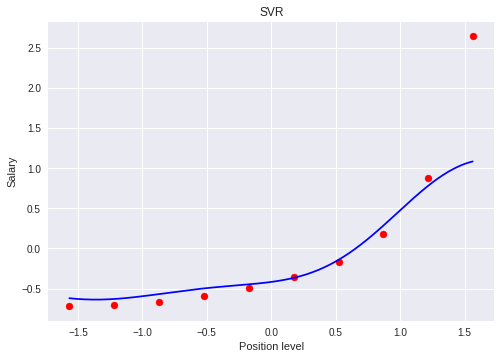

In [43]:
# Visualising the SVR results (for higher resolution and smoother curve)

x_grid = np.arange(min(x), max(x), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, reg.predict(x_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()